## Set up

In [1]:
import os
import sys
import random
import time
import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1, '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/src/py')

from utils.mysql_util import get_db_proxy

db = get_db_proxy()

data_dir = '../../datasets/new_dataset/'
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

%matplotlib inline

### get data

In [2]:
sql = 'select * from suppliers;'
suppliers = db.execute_query(sql)
print(suppliers.shape)
suppliers.head()

(8842, 35)


,id,name,created,tier_id,address,zipcode,gps,vessel_number,fishing_gear_liscense_number,contact_name,...,province_id,vessel_type_id,total_num_men_workers,total_num_women_workers,subindustry_id,golden_dreams_employer_id,description,website,lat,lng
0,1,89 Subcharoen,2020-01-16,None,-,-,-,-,None,-,...,NaN,NaN,NaN,NaN,9.0,NaN,None,None,49.2849885,-123.1107974
1,2,A. Anon,2020-01-16,None,-,-,-,-,,-,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,49.2849885,-123.1107974
2,3,A. Arunsamut 1,2020-01-16,None,-,-,-,-,,-,...,NaN,129.0,NaN,NaN,NaN,NaN,None,None,49.2849885,-123.1107974
3,4,A. Arunsamut 6,2020-01-16,None,-,-,-,-,,-,...,NaN,129.0,NaN,NaN,NaN,NaN,None,None,49.2849885,-123.1107974
4,5,A. Arunsamut 7,2020-01-16,None,-,-,-,-,,-,...,NaN,129.0,NaN,NaN,NaN,NaN,None,None,49.2849885,-123.1107974


In [5]:
# suppliers.to_csv(data_dir+'suppliers.csv')

In [6]:
old_cases = pd.read_csv(data_dir + 'cases.csv')
old_cases.shape

(11890, 63)

In [7]:
sql = 'select * from cases;'
cases = db.execute_query(sql)
print(cases.shape)
cases.head()

(11647, 61)


,id,name,created,last_modified,client_nickname,client_phonenumber,client_line_account,client_facebook_account,client_viber_account,client_share_info_consent,...,issue_description,case_category_id,debt_bondage_broker,debt_bondage_detail_broker,issue_getting_better,issue_getting_better_description,issue_workers_affected,issue_workers_affected_description,case_status_id,issue_legacy_level
0,9,None,None,2019-09-08,,,,,,None,...,Client wanted to ask document extension. Visa ...,NaN,None,,None,None,NaN,,1.0,1.0
1,41,None,2018-11-17,2019-03-01,,,,,,Not sure; forgot to ask and need to check back...,...,To update discussing his issues or query with ...,NaN,None,,None,None,NaN,,1.0,1.0
2,62,None,2018-11-18,2020-08-11,,,,,,Yes,...,"The caller Myint Myint Zar, Worker ID 59CS072 ...",2.0,None,,None,None,0.0,,1.0,2.0
3,70,None,2018-11-17,2019-04-23,,,,,,None,...,The worker arrived Thailand one month ago. He ...,NaN,None,,None,None,NaN,,1.0,3.0
4,73,None,2018-11-19,2019-03-01,,,,,,None,...,The client introduce himself and his migration...,NaN,None,,None,None,NaN,,1.0,1.0


In [14]:
sorted([item for item in cases.created.unique() if item is not None ])

[datetime.date(3, 12, 29),
 datetime.date(202, 2, 2),
 datetime.date(202, 4, 7),
 datetime.date(2015, 4, 7),
 datetime.date(2015, 11, 20),
 datetime.date(2016, 10, 4),
 datetime.date(2016, 10, 5),
 datetime.date(2017, 2, 26),
 datetime.date(2018, 3, 28),
 datetime.date(2018, 7, 30),
 datetime.date(2018, 8, 26),
 datetime.date(2018, 9, 1),
 datetime.date(2018, 9, 2),
 datetime.date(2018, 9, 3),
 datetime.date(2018, 9, 4),
 datetime.date(2018, 9, 5),
 datetime.date(2018, 9, 6),
 datetime.date(2018, 9, 7),
 datetime.date(2018, 9, 8),
 datetime.date(2018, 9, 9),
 datetime.date(2018, 9, 10),
 datetime.date(2018, 9, 11),
 datetime.date(2018, 9, 13),
 datetime.date(2018, 9, 17),
 datetime.date(2018, 9, 18),
 datetime.date(2018, 9, 19),
 datetime.date(2018, 9, 20),
 datetime.date(2018, 9, 23),
 datetime.date(2018, 9, 24),
 datetime.date(2018, 9, 25),
 datetime.date(2018, 9, 27),
 datetime.date(2018, 10, 2),
 datetime.date(2018, 10, 4),
 datetime.date(2018, 10, 5),
 datetime.date(2018, 10, 6),


In [26]:
# old_case_dates = sorted([item for item in old_cases.created.unique() if item is not None and pd.notnull(item)])
print('first 10:', old_case_dates[:15])
print()
print('last 10:', old_case_dates[-10:])

first 10: ['0003-12-29', '0202-02-02', '0202-04-07', '2015-04-07', '2015-11-20', '2016-10-04', '2016-10-05', '2017-02-26', '2018-03-28', '2018-07-30', '2018-08-26', '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04']

last 10: ['2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-10-14', '2020-12-01', '2020-12-06', '2109-08-03', '2109-09-08']


### count case data by month

In [20]:
cases = cases[(cases.created<datetime.date(2020, 12, 10)) & (cases.created>datetime.date(2018, 8, 30))]

months = [datetime.date(2018, m, 1) for m in [9, 10, 11, 12]] + \
         [datetime.date(2019, m, 1) for m in range(1, 13)] + \
         [datetime.date(2020, m, 1) for m in range(1, 13)] + [datetime.date(2021, 1, 1)]
bins = {}
for month_idx in range(len(months)-1):
    start_m = months[month_idx]
    end_m = months[month_idx+1]
    count_data = cases[(cases.created>=start_m) & (cases.created<end_m)].shape[0]
    bins[start_m] = count_data
bins

{datetime.date(2018, 9, 1): 67,
 datetime.date(2018, 10, 1): 45,
 datetime.date(2018, 11, 1): 341,
 datetime.date(2018, 12, 1): 162,
 datetime.date(2019, 1, 1): 279,
 datetime.date(2019, 2, 1): 245,
 datetime.date(2019, 3, 1): 362,
 datetime.date(2019, 4, 1): 381,
 datetime.date(2019, 5, 1): 367,
 datetime.date(2019, 6, 1): 338,
 datetime.date(2019, 7, 1): 336,
 datetime.date(2019, 8, 1): 347,
 datetime.date(2019, 9, 1): 496,
 datetime.date(2019, 10, 1): 684,
 datetime.date(2019, 11, 1): 349,
 datetime.date(2019, 12, 1): 350,
 datetime.date(2020, 1, 1): 462,
 datetime.date(2020, 2, 1): 460,
 datetime.date(2020, 3, 1): 763,
 datetime.date(2020, 4, 1): 353,
 datetime.date(2020, 5, 1): 848,
 datetime.date(2020, 6, 1): 549,
 datetime.date(2020, 7, 1): 741,
 datetime.date(2020, 8, 1): 647,
 datetime.date(2020, 9, 1): 422,
 datetime.date(2020, 10, 1): 314,
 datetime.date(2020, 11, 1): 686,
 datetime.date(2020, 12, 1): 195}

In [32]:
old_cases = old_cases[(old_cases.created<'2020-10-01') & (old_cases.created>'2018-08-30')]
old_cases.created = pd.to_datetime(old_cases.created)

In [34]:
old_months = [datetime.date(2018, m, 1) for m in [9, 10, 11, 12]] + \
         [datetime.date(2019, m, 1) for m in range(1, 13)] + \
         [datetime.date(2020, m, 1) for m in range(1, 10)]
old_bins = {}
for month_idx in range(len(old_months)-1):
    start_m = old_months[month_idx]
    end_m = old_months[month_idx+1]
    count_data = old_cases[(old_cases.created>=start_m) & (old_cases.created<end_m)].shape[0]
    old_bins[start_m] = count_data
old_bins

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


{datetime.date(2018, 9, 1): 70,
 datetime.date(2018, 10, 1): 47,
 datetime.date(2018, 11, 1): 365,
 datetime.date(2018, 12, 1): 184,
 datetime.date(2019, 1, 1): 303,
 datetime.date(2019, 2, 1): 292,
 datetime.date(2019, 3, 1): 403,
 datetime.date(2019, 4, 1): 462,
 datetime.date(2019, 5, 1): 454,
 datetime.date(2019, 6, 1): 399,
 datetime.date(2019, 7, 1): 371,
 datetime.date(2019, 8, 1): 424,
 datetime.date(2019, 9, 1): 619,
 datetime.date(2019, 10, 1): 886,
 datetime.date(2019, 11, 1): 413,
 datetime.date(2019, 12, 1): 478,
 datetime.date(2020, 1, 1): 509,
 datetime.date(2020, 2, 1): 515,
 datetime.date(2020, 3, 1): 814,
 datetime.date(2020, 4, 1): 404,
 datetime.date(2020, 5, 1): 937,
 datetime.date(2020, 6, 1): 727,
 datetime.date(2020, 7, 1): 923,
 datetime.date(2020, 8, 1): 751}

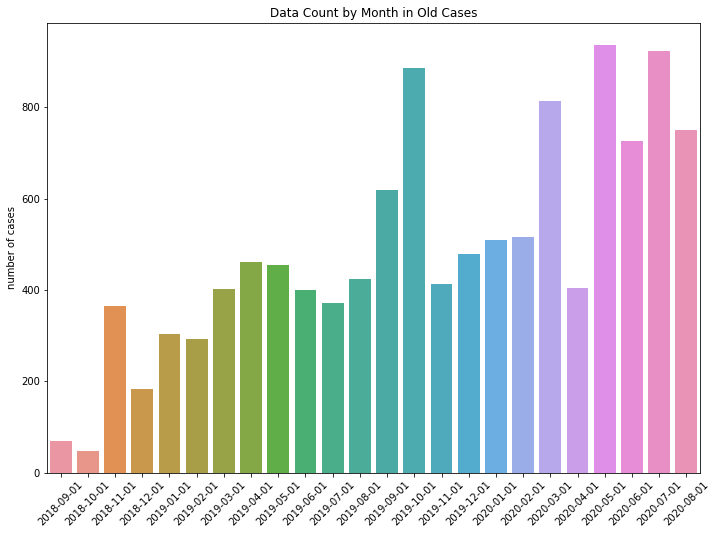

In [40]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

barplot = sns.barplot(list(old_bins.keys()), list(old_bins.values()))
for item in barplot.get_xticklabels():
    item.set_rotation(45)
plt.title('Data Count by Month in Old Cases')
plt.ylabel('number of cases')
plt.show()

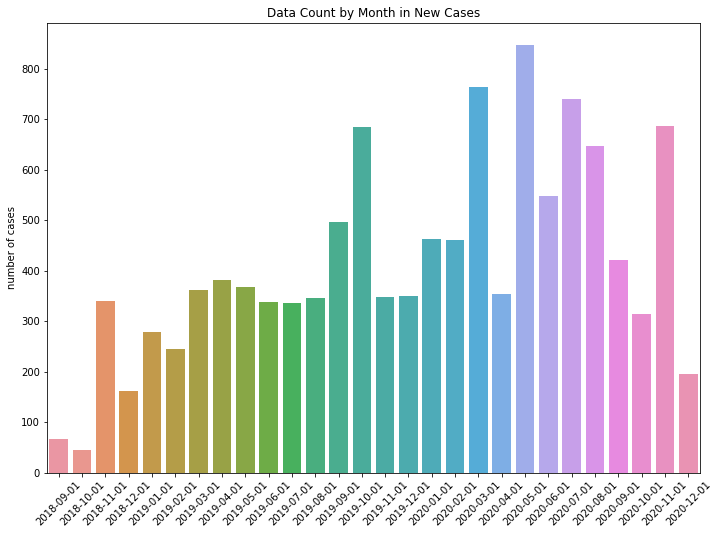

In [41]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

barplot = sns.barplot(list(bins.keys()), list(bins.values()))
for item in barplot.get_xticklabels():
    item.set_rotation(45)
plt.title('Data Count by Month in New Cases')
plt.ylabel('number of cases')
plt.show()

### merge case KPI

In [44]:
sql = 'select * from cases_kpis;'
cases_kpis = db.execute_query(sql)
print(cases_kpis.shape)
print(pd.read_csv(data_dir + 'cases_kpis.csv').shape)
cases_kpis.to_csv(data_dir + 'new_cases_kpis.csv', index=False)
cases_kpis.head()

(4894, 3)
(4481, 3)


,id,case_id,kpi_id
0,1,9,4
1,2,9,7
2,3,9,9
3,4,62,55
4,532,70,29


In [45]:
print(cases_kpis.shape)
print(cases_kpis.case_id.describe())
print(cases_kpis.kpi_id.describe())

(4894, 3)
count     4894.000000
mean      6749.063139
std       3250.747584
min          9.000000
25%       4140.000000
50%       6545.500000
75%       9510.250000
max      12518.000000
Name: case_id, dtype: float64
count    4894.000000
mean       35.946669
std        23.237588
min         1.000000
25%        18.000000
50%        33.000000
75%        53.000000
max        88.000000
Name: kpi_id, dtype: float64


In [46]:
cases = pd.merge(cases, cases_kpis[['case_id', 'kpi_id']], left_on='id', right_on='case_id', how='left')
print(cases.shape)
cases.head()

(13492, 63)


,id,name,created,last_modified,client_nickname,client_phonenumber,client_line_account,client_facebook_account,client_viber_account,client_share_info_consent,...,debt_bondage_broker,debt_bondage_detail_broker,issue_getting_better,issue_getting_better_description,issue_workers_affected,issue_workers_affected_description,case_status_id,issue_legacy_level,case_id,kpi_id
0,41,None,2018-11-17,2019-03-01,,,,,,Not sure; forgot to ask and need to check back...,...,None,,None,None,NaN,,1.0,1.0,NaN,NaN
1,62,None,2018-11-18,2020-08-11,,,,,,Yes,...,None,,None,None,0.0,,1.0,2.0,62.0,55.0
2,70,None,2018-11-17,2019-04-23,,,,,,None,...,None,,None,None,NaN,,1.0,3.0,70.0,29.0
3,73,None,2018-11-19,2019-03-01,,,,,,None,...,None,,None,None,NaN,,1.0,1.0,NaN,NaN
4,93,None,2018-11-19,2019-09-08,,,,,,Not sure; forgot to ask and need to check back...,...,None,,None,None,NaN,,1.0,2.0,NaN,NaN


In [47]:
cases.to_csv(data_dir + 'cases.csv', index=False)

### 2020 demand

In [48]:
sql = 'select * from 2020_thai_demand_approved;'
demand_data = db.execute_query(sql)
print(demand_data.shape)
demand_data.head()

(991, 11)


,week,month,recruiter_name,supplier_name,province,Type of Factory,industry,subindustry,demand_approved_male,demand_approved_female,demand_approved_total
0,2-2020,January,"Yun Nadi Oo Co., Ltd","A.E.C. Canning Co., Ltd",Rayong,Seafood Production,Seafood,Seafood processing and canning,20,30,50
1,2-2020,January,"Shwe Phyo Thar Co., Ltd","Adithep 2019 Construction Ltd., Part",Suphanburi,Construction,Construction,Construction,20,5,25
2,2-2020,January,"Shwe Sin Koe Pwint Co., Ltd","Banbung Namkangsong Co., Ltd",Chonburi,Ice Factory,Food and Beverage,Water and ice,15,5,20
3,2-2020,January,"Htet Mann Services Co., Ltd","Business Idea Co., Ltd",Bangkok,Goods Transportation,Services,Transportation and storage,3,0,3
4,2-2020,January,"Myanmar Pleasant Scenery Co., Ltd","Chaiwongsai Construction Co., Ltd",Phuket,Construction,Construction,Construction,15,0,15


In [52]:
def convert_year_week(week_year):
    week, year = week_year.split('-')
    return year + '-' + week
year_week = demand_data['week'].apply(convert_year_week)
print('number of unique weeks', year_week.nunique(), 'min:',year_week.min(), 'max', year_week.max())
print(year_week.unique())

number of unique weeks 8 min: 2020-2 max 2020-9
['2020-2' '2020-8' '2020-5' '2020-6' '2020-3' '2020-4' '2020-9' '2020-7']


In [53]:
demand_data['year_week'] = year_week
demand_data.to_csv(data_dir + '2020_demand_data.csv', index=False)

In [54]:
sql = 'select * from 2018_thai_demand_approved;'
demand_data2018 = db.execute_query(sql)
print(demand_data2018.shape)
demand_data2018.head()

(5533, 12)


,orig_id,week,month,recruiter_name,supplier_name,province,Type of Factory,industry,subindustry,demand_approved_male,demand_approved_female,demand_approved_total
0,1,13-2018,March,"Great Silver Land Services Co., Ltd",1 5 Limited Partnership,Samut Sakhon,Construction,Construction,Construction,45,5,50
1,2,13-2018,March,"Golden Sea Myanmar Co., Ltd","101 Hat Co., Ltd",Bangkok,Hat Production,Manufacturing,Garments and apparel,5,5,10
2,3,38-2018,September,"Ngwe Kyal Sin Hein Co., Ltd","11R Group Co., Ltd.",Pathum Thani,Construction,Construction,Construction,10,10,20
3,4,42-2018,October,"Nice Way General Services Co.,Ltd","15 Union Co., Ltd",Nonthaburi,Construction,Construction,Construction,60,20,80
4,5,38-2018,September,"Direct Resources Co., Ltd","19 Building Co., Ltd",Chonburi,Construction,Construction,Construction,15,0,15


In [55]:
demand_data2018['year_week'] = demand_data2018['week'].apply(convert_year_week)
demand_data2018.to_csv(data_dir + '2018_demand_data.csv', index=False)

In [56]:
sql = 'select * from 2019_Thai_Demand_Approved;'
demand_data2019 = db.execute_query(sql)
print(demand_data2019.shape)
demand_data2019.head()

(7053, 12)


,Month,Week,recruiter_name,supplier_name,province,type_of_factory,industry,subindustry,num_males,num_females,num_total,record_date
0,January,1-2019,"Trade Wind Co., Ltd",Bangpla Lohakit Limited Partnership,Bangkok,Construction,Construction,Construction,26,0,26,2019-01-06
1,January,1-2019,"Libra Life Co., Ltd","Hi Tech Chaiyaphum Apparel Co., Ltd",Chaiyaphum,Garments,Manufacturing,Garments and apparel,60,140,200,2019-01-06
2,January,1-2019,"Myanmar The Best One Manpower Group Co., Ltd","Houghua Co., Ltd",Nonthaburi,Paper Manufacturing,Manufacturing,Paper,8,8,16,2019-01-06
3,January,1-2019,"Yangon Win Star General Service Co., Ltd","I Celea Co., Ltd",Samut Prakan,Silver ware Manufacturing & Distribution,Manufacturing,Jewelry,5,5,10,2019-01-06
4,January,1-2019,"Libra Life Co., Ltd","Kitchareon Chareconmuang Co., Ltd",Bangkok,Iron Materials Distribution,Manufacturing,Iron and metals,5,0,5,2019-01-06


In [58]:
demand_data2019['year_week'] = demand_data2019['Week'].apply(convert_year_week)
demand_data2019.to_csv(data_dir + '2019_demand_data.csv', index=False)

## 2018 worker voice

In [2]:
sql = 'select * from legacy_worker_jan_nov_2018;'
prev_cases = db.execute_query(sql)
print(prev_cases.shape)
prev_cases.head()

(10129, 52)


,id,timestamp,call_date,issara_staff_id,interaction_channel_id,client_gender_id,client_nationality_id,client_ethnicity_id,country_id,province_id,...,industry_id,subindustry_id,workplace_id,contract_type_id,document_type_id,client_status_id,client_type_id,referral_action_id,recruiter_id,supplier_id
0,1,2018-03-22,2018-03-22,29,1,2.0,1,5.0,5.0,76.0,...,16.0,71.0,1.0,1.0,3.0,13.0,13.0,NaN,NaN,179.0
1,2,2018-03-23,2018-02-03,53,2,1.0,1,NaN,8.0,70.0,...,11.0,46.0,NaN,4.0,4.0,13.0,13.0,4.0,10.0,5685.0
2,3,2018-03-25,2018-03-25,54,1,1.0,2,9.0,8.0,77.0,...,21.0,36.0,1.0,4.0,4.0,2.0,2.0,3.0,NaN,17655.0
3,4,2018-03-25,2018-03-25,3,1,1.0,1,1.0,5.0,NaN,...,16.0,69.0,12.0,4.0,1.0,NaN,13.0,3.0,NaN,17657.0
4,5,2018-03-26,2018-03-26,29,1,2.0,1,8.0,8.0,123.0,...,16.0,71.0,1.0,1.0,3.0,2.0,2.0,NaN,NaN,227.0


In [3]:
prev_cases.call_date.min(), prev_cases.call_date.max()

(datetime.date(2017, 1, 10), datetime.date(2018, 12, 9))

In [6]:
#[datetime.date(2018, m, 1) for m in [9, 10, 11, 12]] + \
old_months = \
         [datetime.date(2017, m, 1) for m in range(1, 13)] + \
         [datetime.date(2018, m, 1) for m in range(1, 13)]
old_bins = {}
for month_idx in range(len(old_months)-1):
    start_m = old_months[month_idx]
    end_m = old_months[month_idx+1]
    count_data = prev_cases[(prev_cases.call_date>=start_m) & (prev_cases.call_date<end_m)].shape[0]
    old_bins[start_m] = count_data
old_bins

{datetime.date(2017, 1, 1): 1,
 datetime.date(2017, 2, 1): 3,
 datetime.date(2017, 3, 1): 7,
 datetime.date(2017, 4, 1): 37,
 datetime.date(2017, 5, 1): 21,
 datetime.date(2017, 6, 1): 17,
 datetime.date(2017, 7, 1): 2,
 datetime.date(2017, 8, 1): 34,
 datetime.date(2017, 9, 1): 14,
 datetime.date(2017, 10, 1): 23,
 datetime.date(2017, 11, 1): 5,
 datetime.date(2017, 12, 1): 83,
 datetime.date(2018, 1, 1): 520,
 datetime.date(2018, 2, 1): 1040,
 datetime.date(2018, 3, 1): 1032,
 datetime.date(2018, 4, 1): 658,
 datetime.date(2018, 5, 1): 655,
 datetime.date(2018, 6, 1): 767,
 datetime.date(2018, 7, 1): 2736,
 datetime.date(2018, 8, 1): 1564,
 datetime.date(2018, 9, 1): 479,
 datetime.date(2018, 10, 1): 174,
 datetime.date(2018, 11, 1): 136}

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


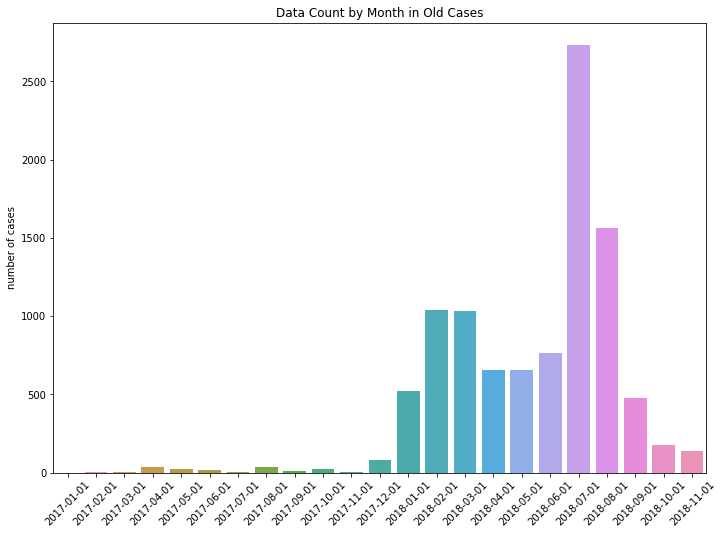

In [7]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

barplot = sns.barplot(list(old_bins.keys()), list(old_bins.values()))
for item in barplot.get_xticklabels():
    item.set_rotation(45)
plt.title('Data Count by Month in Old Cases')
plt.ylabel('number of cases')
plt.show()

In [8]:
prev_cases.to_csv(data_dir + 'prev_wv_data.csv', index=False)

### old

In [27]:
sum(pd.isnull(cases.supplier_id)) / cases.shape[0]

0.027466534457114528

In [34]:
sum(pd.isnull(cases.province_id)) / cases.shape[0]

0.2627664848785325

In [29]:
sum(pd.notnull(cases.supplier_id) & pd.notnull(cases.province_id)) / cases.shape[0]

0.7192860684184432

In [30]:
sum(pd.isnull(cases.supplier_id) & pd.notnull(cases.province_id)) / cases.shape[0]

0.017947446703024294

In [31]:
suppliers.head()

,id,name,created,tier_id,address,zipcode,gps,vessel_number,fishing_gear_liscense_number,contact_name,...,other,country_id,district_id,industry_id,province_id,vessel_type_id,total_num_men_workers,total_num_women_workers,subindustry_id,golden_dreams_employer_id
0,1,89 Subcharoen,2020-01-16,None,-,-,-,-,None,-,...,,NaN,NaN,21.0,NaN,NaN,NaN,NaN,9.0,None
1,2,A. Anon,2020-01-16,None,-,-,-,-,,-,...,,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,None
2,3,A. Arunsamut 1,2020-01-16,None,-,-,-,-,,-,...,,8.0,46.0,16.0,NaN,129.0,NaN,NaN,NaN,None
3,4,A. Arunsamut 6,2020-01-16,None,-,-,-,-,,-,...,,8.0,46.0,16.0,NaN,129.0,NaN,NaN,NaN,None
4,5,A. Arunsamut 7,2020-01-16,None,-,-,-,-,,-,...,,8.0,46.0,16.0,NaN,129.0,NaN,NaN,NaN,None


In [33]:
sum(pd.isnull(suppliers.industry_id)) / suppliers.shape[0]

0.011780697779791573

In [ ]:
sum(pd.isnull(cases.supplier_id)) / cases.shape[0]

In [16]:
# data_dir = '../../datasets/new_dataset/'
# os.makedirs('../../datasets/new_dataset')
# cases.to_csv(data_dir + 'cases.csv')

In [9]:
print(sum(pd.isnull(cases.province_id)) / cases.shape[0], cases.shape[0])

0.2627664848785325 10085


In [17]:
sql = 'select * from mm_thai_demand_data;'
demand_data = db.execute_query(sql)
demand_data.to_csv(data_dir + 'demand_data.csv')
demand_data.head()

,id,created,week,year,month,year_month,recruiter_name,supplier_name,province,type_of_factory,...,subindustry,factorytype_id,ilm_industry_id,ilm_subindustry_id,num_total,num_females,num_males,recruiter_id,supplier_id,record_date
0,1,2020-06-24,16-2017,2017,April,2017-04,"Labour Asia Services Co., Ltd","145 Sriayutthaya Concrete Co., Ltd",Phra Nakhon Si Ayutthaya,Construction materials manufacturing,...,Construction materials,1,3,21,50,15,35,418.0,1178,2017-04-16
1,2,2020-06-24,48-2017,2017,November,2017-11,"Good Job Co., Ltd","225 Construction and Service Co., Ltd",Bangkok,Construction,...,Construction,2,3,20,15,0,15,419.0,1179,2017-11-26
2,3,2020-06-24,16-2017,2017,April,2017-04,"Lucky Employment Co., Ltd","2K Interfood Co., Ltd",Saraburi,Food processing,...,Other,3,21,19,20,8,12,246.0,1180,2017-04-16
3,4,2020-06-24,5-2017,2017,January,2017-01,"Lovely World Services Co., Ltd","3 Porn Co., Ltd",Bangkok,Construction,...,Construction,2,3,20,100,40,60,34.0,1181,2017-01-29
4,5,2020-06-24,5-2017,2017,January,2017-01,"Lovely World Services Co., Ltd","3 Porn Co., Ltd",Bangkok,Construction,...,Construction,2,3,20,100,40,60,34.0,1181,2017-01-29


In [18]:
print(demand_data.shape)

(3093, 21)


In [20]:
def convert_year_week(week_year):
    week, year = week_year.split('-')
    return year + '-' + week
year_week = demand_data['week'].apply(convert_year_week)
print(year_week.nunique(), year_week.min(), year_week.max())

52 2017-1 2018-1


In [21]:
sql = 'select * from mm_thai_demand_data_back;'
demand_data_back = db.execute_query(sql)
demand_data_back.to_csv(data_dir + 'demand_data_back.csv')
demand_data_back.head()

,id,created,week,year,month,year_month,recruiter_name,supplier_name,province,type_of_factory,industry,subindustry,Male,Female,factory_type
0,1,2020-06-24,16-2017,2017,April,2017-04,"Labour Asia Services Co., Ltd","145 Sriayutthaya Concrete Co., Ltd",Phra Nakhon Si Ayutthaya,Construction materials manufacturing,Construction,Construction materials,35,15,50
1,2,2020-06-24,48-2017,2017,November,2017-11,"Good Job Co., Ltd","225 Construction and Service Co., Ltd",Bangkok,Construction,Construction,Construction,15,0,15
2,3,2020-06-24,16-2017,2017,April,2017-04,"Lucky Employment Co., Ltd","2K Interfood Co., Ltd",Saraburi,Food processing,Food and Beverage,Other,12,8,20
3,4,2020-06-24,5-2017,2017,January,2017-01,"Lovely World Services Co., Ltd","3 Porn Co., Ltd",Bangkok,Construction,Construction,Construction,60,40,100
4,5,2020-06-24,5-2017,2017,January,2017-01,"Lovely World Services Co., Ltd","3 Porn Co., Ltd",Bangkok,Construction,Construction,Construction,60,40,100


In [22]:
year_week = demand_data_back['week'].apply(convert_year_week)
print(year_week.nunique(), year_week.min(), year_week.max())

52 2017-1 2018-1


In [24]:
sql = 'select * from issue_categories;'
categories = db.execute_query(sql)
categories

,id,name
0,1,"Labour trafficking, exploitation, and labour-r..."
1,2,"Info query on migrant rights, registration, do..."
2,3,Other non-labour crime against migrants
3,4,Migrant health issue
4,5,Coordination with Issara


In [36]:
categories.to_csv(data_dir+'categories.csv', index=False)

In [35]:
os.listdir(data_dir)

['demand_data_back.csv', 'cases.csv', 'suppliers.csv', 'demand_data.csv']

In [51]:
sql = 'select id, name from provinces where country_id = 8;'
provinces = db.execute_query(sql)
print(provinces.shape)
provinces.head()


(77, 2)


,id,name
0,62,Chiang Mai
1,63,Chiang Rai
2,64,Phetchaburi
3,65,Phetchabun
4,66,Loei


In [52]:
provinces.to_csv(data_dir + 'provinces.csv', index=False)

In [48]:
sql = 'select id, name from industries;'
industries = db.execute_query(sql)
industries.head()


,id,name
0,1,Agriculture and Forestry
1,3,Construction
2,11,Manufacturing
3,12,Mining
4,13,Packaging


In [49]:
industries.to_csv(data_dir + 'industries.csv', index=False)

# demand 2019

In [2]:
sql = 'select * from 2019_Thai_Demand_Approved;'
demand2019 = db.execute_query(sql)
print(demand2019.shape)
demand2019.head()

(7053, 12)


,Month,Week,recruiter_name,supplier_name,province,type_of_factory,industry,subindustry,num_males,num_females,num_total,record_date
0,January,1-2019,"Trade Wind Co., Ltd",Bangpla Lohakit Limited Partnership,Bangkok,Construction,Construction,Construction,26,0,26,2019-01-06
1,January,1-2019,"Libra Life Co., Ltd","Hi Tech Chaiyaphum Apparel Co., Ltd",Chaiyaphum,Garments,Manufacturing,Garments and apparel,60,140,200,2019-01-06
2,January,1-2019,"Myanmar The Best One Manpower Group Co., Ltd","Houghua Co., Ltd",Nonthaburi,Paper Manufacturing,Manufacturing,Paper,8,8,16,2019-01-06
3,January,1-2019,"Yangon Win Star General Service Co., Ltd","I Celea Co., Ltd",Samut Prakan,Silver ware Manufacturing & Distribution,Manufacturing,Jewelry,5,5,10,2019-01-06
4,January,1-2019,"Libra Life Co., Ltd","Kitchareon Chareconmuang Co., Ltd",Bangkok,Iron Materials Distribution,Manufacturing,Iron and metals,5,0,5,2019-01-06


In [3]:
demand_dir = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Data/Demand_data/clean/'
demand2019.to_csv(demand_dir + 'demand_2019_complete.csv', index=False)

In [5]:
sql = 'select * from 2018_thai_demand_approved;'
demand2018 = db.execute_query(sql)
print(demand2018.shape)
demand2018.head()

(5533, 12)


,orig_id,week,month,recruiter_name,supplier_name,province,Type of Factory,industry,subindustry,demand_approved_male,demand_approved_female,demand_approved_total
0,1,13-2018,March,"Great Silver Land Services Co., Ltd",1 5 Limited Partnership,Samut Sakhon,Construction,Construction,Construction,45,5,50
1,2,13-2018,March,"Golden Sea Myanmar Co., Ltd","101 Hat Co., Ltd",Bangkok,Hat Production,Manufacturing,Garments and apparel,5,5,10
2,3,38-2018,September,"Ngwe Kyal Sin Hein Co., Ltd","11R Group Co., Ltd.",Pathum Thani,Construction,Construction,Construction,10,10,20
3,4,42-2018,October,"Nice Way General Services Co.,Ltd","15 Union Co., Ltd",Nonthaburi,Construction,Construction,Construction,60,20,80
4,5,38-2018,September,"Direct Resources Co., Ltd","19 Building Co., Ltd",Chonburi,Construction,Construction,Construction,15,0,15


In [6]:
demand2018.to_csv(demand_dir + 'demand_2018_complete.csv', index=False)